In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
import math

In [3]:
#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

def kmeans(k,X):

    # d - Dimensionality of X
    d = len(X[0]) 
    Max_Iterations = 1000
    i = 0
    cluster = [0] * len(X)
    prev_cluster = [-1] * len(X)
    
    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers += [random.choice(X)]
        
        
        #Sometimes The Random points are chosen poorly and so there ends up being empty clusters
        #In this particular implementation we want to force K exact clusters.
        #To take this feature off, simply take away "force_recalculation" from the while conditional.
        force_recalculation = False
    
    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :
        
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
    
        #Update Point's Cluster Alligiance
        for p in range(0,len(X)):
            min_dist = float("inf")
            
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(X[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   # Reassign Point to new Cluster
        
        
        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(X)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += X[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                #This means that our initial random assignment was poorly chosen
                #Change it to a new X to actually force k clusters
                else: 
                    new_center = random.choice(X)
                    force_recalculation = True
                    print ("Forced Recalculation...")
                    
            
            cluster_centers[k] = new_center
    
       
    print( "======== (: Results :) ========")
    
    print ("Iterations",i)
    
    print ("Classes", cluster)
    
    return cluster_centers   


1D data

In [4]:
X=[(2,),(3,),(4,),(10,),(11,)]
print("Centers: ", kmeans(2,X))


======== (: Results :) ========
Iterations 3
Classes [0, 0, 0, 1, 1]
Centers:  [[3.0], [10.5]]


2D data

In [ ]:
y = [(3,2),(2,2),(1,2),(0,1),(1,0),(1,1),(5,6),(7,7),(9,10),(11,13),(12,12),(12,13),(13,13)]
print("Centers: ", kmeans(2,y))


======== (: Results :) ========
Iterations 4
Classes [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
Centers:  [[2.5, 2.625], [11.4, 12.2]]


Test Picture :)

In [ ]:
from PIL import Image

<class 'numpy.ndarray'> (159, 318)


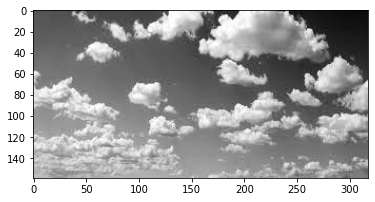

<class 'numpy.ndarray'> (50562,)
(50562,)
<class 'numpy.ndarray'>


In [ ]:
img=Image.open('download.jpg').convert('L')
img_arr=np.array(img)
print(type(img_arr),(img_arr.shape))
plt.figure()
plt.imshow(img_arr,cmap='gray')
plt.show()
one_dim=np.reshape(img_arr,(159*318,))

In [ ]:
a=kmeans(10,img_arr)
print(a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


Classes [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[[217.0, 209.8, 188.1, 177.1, 171.7, 165.3, 169.2, 172.3, 179.5, 183.6, 184.2, 195.7, 194.5, 181.5, 180.6, 175.0, 178.6, 180.5, 187.9, 212.1, 215.5, 204.7, 206.7, 205.9, 226.3, 228.0, 231.7, 230.7, 229.7, 226.2, 226.6, 227.3, 214.8, 204.3, 194.6, 188.8, 187.2, 180.1, 176.0, 171.2, 161.0, 155.1, 150.3, 149.7, 151.2, 151.4, 150.1, 148.9, 149.4, 149.0, 149.0, 148.9, 148.4, 148.2, 148.1, 147.7, 146.8, 146.7, 146.2, 145.9, 145.7, 145.0, 144.9, 144.7, 145.5, 145.3, 144.6, 144.0, 143.2, 142.9, 142.5, 142.4, 141.5, 1

In [ ]:
b=kmeans(10,one_dim[:, np.newaxis])
print(b)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


Classes [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 3, 5, 0, 5, 0, 0, 5, 2, 3, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 7, 4, 4, 4, 7, 4, 4, 7, 9, 7, 4, 7, 9, 7, 4, 4, 7, 7, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 7, 8, 8, 8, 4, 7, 7, 4, 4, 8, 8, 8, 4, 7, 4, 4, 7, 7, 9, 9, 2, 2, 2, 3, 3, 6, 6, 0, 1, 6, 1, 1, 2, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

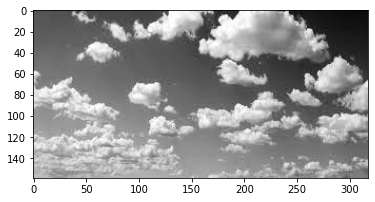

In [ ]:
plt.figure()
c=one_dim[:, np.newaxis].reshape(159,318,)
plt.imshow(c,cmap='gray')


Clorored Picture

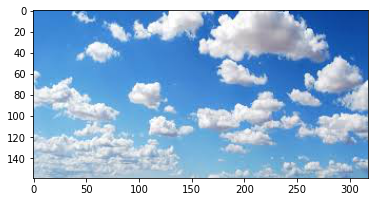

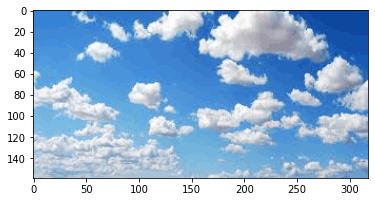

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
obb=KMeans(100)
img=(Image.open('download.jpg'))                          
img_arr=np.array(img)                                               
plt.figure()
plt.imshow(img_arr)
plt.show()
img_data=np.reshape(img_arr,(159*318,3))                               
x=img_data  
obb.fit(x)        
center= obb.cluster_centers_
label = np.reshape(obb.labels_,(159,318))
plt.imshow(center[label].reshape(159,318,3).astype('uint8'))
plt.show()